In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [5]:
data = 'depfin.csv'

df = pd.read_csv(data, header=None)

In [6]:
df.shape

(1004, 13)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,18,70,Good,8,Yes,Single,3,Good,No,No,No,No,Yes
1,18,60,Normal,10,Yes,Single,3,Good,No,No,No,No,Yes
2,19,70,Good,8,Yes,Single,4,Good,Yes,Yes,No,No,Yes
3,19,50,Normal,6,Yes,Single,2,Good,No,Yes,No,Yes,No
4,18,90,Good,10,Yes,Single,2,Good,No,Yes,No,No,Yes


In [8]:
col_names = ['feeling', 'sleep', 'finance','understanding','living','inferiority','sick','recreation','scale']
df.columns = col_names
col_names

ValueError: Length mismatch: Expected axis has 13 elements, new values have 9 elements

In [ ]:
df.head()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
feeling          186 non-null object
sleep            186 non-null int64
finance          186 non-null object
understanding    186 non-null object
living           186 non-null object
inferiority      186 non-null object
sick             186 non-null object
recreation       186 non-null object
scale            186 non-null int64
dtypes: int64(2), object(7)
memory usage: 13.2+ KB


In [11]:
df.head()

,feeling,sleep,finance,understanding,living,inferiority,sick,recreation,scale
0,Good,8,Yes,Good,No,No,No,Yes,70
1,Normal,10,Yes,Good,No,No,No,Yes,60
2,Good,8,Yes,Good,Yes,No,No,Yes,70
3,Normal,6,Yes,Good,Yes,No,Yes,No,50
4,Good,10,Yes,Good,Yes,No,No,Yes,90


In [12]:
df.describe()

,sleep,scale
count,186.000000,186.000000
mean,5.155914,50.322581
std,2.325509,29.644802
min,1.000000,5.000000
25%,3.000000,25.000000
50%,6.000000,50.000000
75%,7.000000,75.000000
max,10.000000,100.000000


In [13]:
X = df.iloc[:,0:9].values
X

array([['Good', 8, 'Yes', ..., 'No', 'Yes', 70],
       ['Normal', 10, 'Yes', ..., 'No', 'Yes', 60],
       ['Good', 8, 'Yes', ..., 'No', 'Yes', 70],
       ...,
       ['Bad', 3, 'No', ..., 'Yes', 'No', 35],
       ['Bad', 3, 'No', ..., 'No', 'No', 30],
       ['Normal', 6, 'Yes', ..., 'Yes', 'Yes', 55]], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
X[:,0]= label_encoder_x.fit_transform(X[:, 0]) 
X[:,2]= label_encoder_x.fit_transform(X[:, 2]) 
X[:,3]= label_encoder_x.fit_transform(X[:, 3]) 
X[:,4]= label_encoder_x.fit_transform(X[:, 4]) 
X[:,5]= label_encoder_x.fit_transform(X[:, 5]) 
X[:,6]= label_encoder_x.fit_transform(X[:, 6]) 
X[:,7]= label_encoder_x.fit_transform(X[:, 7]) 

In [15]:
X

array([[1, 8, 1, ..., 0, 1, 70],
       [2, 10, 1, ..., 0, 1, 60],
       [1, 8, 1, ..., 0, 1, 70],
       ...,
       [0, 3, 0, ..., 1, 0, 35],
       [0, 3, 0, ..., 0, 0, 30],
       [2, 6, 1, ..., 1, 1, 55]], dtype=object)

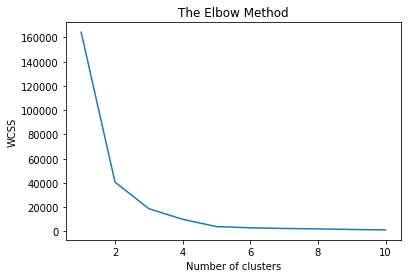

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

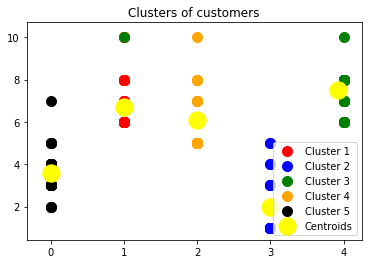

In [18]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()